<a href="https://colab.research.google.com/github/inefable12/OhTd_PointGroup_qmTM_CCDC/blob/main/OhTd_PointGroup_qmTM_CCDC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# __Point Group prediction of coordination compounds using Machine Learning__

Jesus Antonio Alvarado-Huayhuaz

Universidad Nacional de Ingeniería, Perú

November, 2022

Notebook presented in "7th School of Computational Chemistry Artificial intelligence & Machine Learning" 

## __1. Libraries__

In [ ]:
!pip install pycaret

In [2]:
from pycaret.utils import version
version()

'2.3.10'

In [3]:
import pandas as pd
import numpy as np

In [4]:
from pycaret.classification import *

## __2. Data__

Arbitrarily assigned:

T(d) == 0

O(h) == 1

In [5]:
data2 = pd.read_csv("data2.csv", sep = ';',dtype='float')
data2.head(3)

,Point_Group,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,MaxPartialCharge,MinPartialCharge,MaxAbsPartialCharge,MinAbsPartialCharge,FpDensityMorgan1,FpDensityMorgan2,FpDensityMorgan3,BalabanJ,BertzCT,Chi0,Chi0n,Chi0v,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3n,Chi3v,Chi4n,Chi4v,HallKierAlpha,Ipc,Kappa1,Kappa2,Kappa3,LabuteASA,PEOE_VSA1,PEOE_VSA10,PEOE_VSA11,PEOE_VSA12,PEOE_VSA13,PEOE_VSA14,PEOE_VSA2,PEOE_VSA3,PEOE_VSA4,PEOE_VSA5,PEOE_VSA6,PEOE_VSA7,PEOE_VSA8,PEOE_VSA9,SMR_VSA1,SMR_VSA10,SMR_VSA2,SMR_VSA3,SMR_VSA4,SMR_VSA5,SMR_VSA6,SMR_VSA7,SMR_VSA8,SMR_VSA9,SlogP_VSA1,SlogP_VSA10,SlogP_VSA11,SlogP_VSA12,SlogP_VSA2,SlogP_VSA3,SlogP_VSA4,SlogP_VSA5,SlogP_VSA6,SlogP_VSA7,SlogP_VSA8,SlogP_VSA9,TPSA,EState_VSA1,EState_VSA10,EState_VSA11,EState_VSA2,EState_VSA3,EState_VSA4,EState_VSA5,EState_VSA6,EState_VSA7,EState_VSA8,EState_VSA9,VSA_EState1,VSA_EState10,VSA_EState2,VSA_EState3,VSA_EState4,VSA_EState5,VSA_EState6,VSA_EState7,VSA_EState8,VSA_EState9,FractionCSP3,HeavyAtomCount,NHOHCount,NOCount,NumAliphaticCarbocycles,NumAliphaticHeterocycles,NumAliphaticRings,NumAromaticCarbocycles,NumAromaticHeterocycles,NumAromaticRings,NumHAcceptors,NumHDonors,NumHeteroatoms,NumRotatableBonds,NumSaturatedCarbocycles,NumSaturatedHeterocycles,NumSaturatedRings,RingCount,MolLogP,MolMR,fr_Al_COO,fr_Al_OH,fr_Al_OH_noTert,fr_ArN,fr_Ar_COO,fr_Ar_N,fr_Ar_NH,fr_Ar_OH,fr_COO,fr_COO2,fr_C_O,fr_C_O_noCOO,fr_C_S,fr_HOCCN,fr_Imine,fr_NH0,fr_NH1,fr_NH2,fr_N_O,fr_Ndealkylation1,fr_Ndealkylation2,fr_Nhpyrrole,fr_SH,fr_aldehyde,fr_alkyl_carbamate,fr_alkyl_halide,fr_allylic_oxid,fr_amide,fr_amidine,fr_aniline,fr_aryl_methyl,fr_azide,fr_azo,fr_barbitur,fr_benzene,fr_benzodiazepine,fr_bicyclic,fr_diazo,fr_dihydropyridine,fr_epoxide,fr_ester,fr_ether,fr_furan,fr_guanido,fr_halogen,fr_hdrzine,fr_hdrzone,fr_imidazole,fr_imide,fr_isocyan,fr_isothiocyan,fr_ketone,fr_ketone_Topliss,fr_lactam,fr_lactone,fr_methoxy,fr_morpholine,fr_nitrile,fr_nitro,fr_nitro_arom,fr_nitro_arom_nonortho,fr_nitroso,fr_oxazole,fr_oxime,fr_para_hydroxylation,fr_phenol,fr_phenol_noOrthoHbond,fr_phos_acid,fr_phos_ester,fr_piperdine,fr_piperzine,fr_priamide,fr_prisulfonamd,fr_pyridine,fr_quatN,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,0.0,5.327438,-0.743056,5.327438,0.586281,0.634819,380.180,355.988,379.050906,125.0,1.0,0.070114,-0.376668,0.376668,0.070114,0.380952,0.476190,0.571429,0.000001,118.071936,15.435029,12.268050,15.583034,10.414214,6.900537,11.862514,3.756713,6.734847,2.232051,2.232051,1.319479,1.319479,1.21013,4.303934e+04,22.210130,21.210130,21.210130,144.680681,28.421178,0.000000,0.000000,0.0,0.0,37.69471,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,79.282584,48.961336,17.154552,0.0,0.0,0.0,0.0,79.282584,0.000000,0.0,0.000000,0.000000,0.0,0.000000,17.154552,79.282584,48.961336,0.0,0.0,0.000000,0.0,0.0,0.0,55.38,20.540159,0.0,0.0,0.000000,79.282584,0.0,0.0,0.0,0.000000,0.0,45.575729,31.964630,-0.743056,0.0,0.0,0.0,0.000000,0.000000,0.0,7.035370,9.840278,1.0,21.0,0.0,6.0,0.0,1.0,1.0,0.0,0.0,0.0,6.0,0.0,9.0,0.0,0.0,1.0,1.0,1.0,1.4761,76.6200,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,5.327438,-0.743056,5.327438,0.586281,0.634819,380.180,355.988,379.050906,125.0,1.0,0.070114,-0.376668,0.376668,0.070114,0.380952,0.476190,0.571429,0.000001,118.071936,15.435029,12.268050,15.583034,10.414214,6.900537,11.862514,3.756713,6.734847,2.232051,2.232051,1.319479,1.319479,1.21013,4.303934e+04,22.210130,21.210130,21.210130,144.680681,28.421178,0.000000,0.000000,0.0,0.0,37.69471,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,79.282584,48.961336,17.1

In [6]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 628 entries, 0 to 627
Columns: 201 entries, Point_Group to fr_urea
dtypes: float64(201)
memory usage: 986.3 KB


In [7]:
data2.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 628 entries, 0 to 627
Data columns (total 201 columns):
 #    Column                    Non-Null Count  Dtype  
---   ------                    --------------  -----  
 0    Point_Group               628 non-null    float64
 1    MaxEStateIndex            628 non-null    float64
 2    MinEStateIndex            628 non-null    float64
 3    MaxAbsEStateIndex         628 non-null    float64
 4    MinAbsEStateIndex         628 non-null    float64
 5    qed                       628 non-null    float64
 6    MolWt                     628 non-null    float64
 7    HeavyAtomMolWt            628 non-null    float64
 8    ExactMolWt                628 non-null    float64
 9    NumValenceElectrons       628 non-null    float64
 10   NumRadicalElectrons       628 non-null    float64
 11   MaxPartialCharge          627 non-null    float64
 12   MinPartialCharge          628 non-null    float64
 13   MaxAbsPartialCharge       627 non-null    float6

In [8]:
freq = data2.groupby(['Point_Group']).count() 
freq

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,MaxPartialCharge,MinPartialCharge,MaxAbsPartialCharge,MinAbsPartialCharge,FpDensityMorgan1,FpDensityMorgan2,FpDensityMorgan3,BalabanJ,BertzCT,Chi0,Chi0n,Chi0v,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3n,Chi3v,Chi4n,Chi4v,HallKierAlpha,Ipc,Kappa1,Kappa2,Kappa3,LabuteASA,PEOE_VSA1,PEOE_VSA10,PEOE_VSA11,PEOE_VSA12,PEOE_VSA13,PEOE_VSA14,PEOE_VSA2,PEOE_VSA3,PEOE_VSA4,PEOE_VSA5,PEOE_VSA6,PEOE_VSA7,PEOE_VSA8,PEOE_VSA9,SMR_VSA1,SMR_VSA10,SMR_VSA2,SMR_VSA3,SMR_VSA4,SMR_VSA5,SMR_VSA6,SMR_VSA7,SMR_VSA8,SMR_VSA9,SlogP_VSA1,SlogP_VSA10,SlogP_VSA11,SlogP_VSA12,SlogP_VSA2,SlogP_VSA3,SlogP_VSA4,SlogP_VSA5,SlogP_VSA6,SlogP_VSA7,SlogP_VSA8,SlogP_VSA9,TPSA,EState_VSA1,EState_VSA10,EState_VSA11,EState_VSA2,EState_VSA3,EState_VSA4,EState_VSA5,EState_VSA6,EState_VSA7,EState_VSA8,EState_VSA9,VSA_EState1,VSA_EState10,VSA_EState2,VSA_EState3,VSA_EState4,VSA_EState5,VSA_EState6,VSA_EState7,VSA_EState8,VSA_EState9,FractionCSP3,HeavyAtomCount,NHOHCount,NOCount,NumAliphaticCarbocycles,NumAliphaticHeterocycles,NumAliphaticRings,NumAromaticCarbocycles,NumAromaticHeterocycles,NumAromaticRings,NumHAcceptors,NumHDonors,NumHeteroatoms,NumRotatableBonds,NumSaturatedCarbocycles,NumSaturatedHeterocycles,NumSaturatedRings,RingCount,MolLogP,MolMR,fr_Al_COO,fr_Al_OH,fr_Al_OH_noTert,fr_ArN,fr_Ar_COO,fr_Ar_N,fr_Ar_NH,fr_Ar_OH,fr_COO,fr_COO2,fr_C_O,fr_C_O_noCOO,fr_C_S,fr_HOCCN,fr_Imine,fr_NH0,fr_NH1,fr_NH2,fr_N_O,fr_Ndealkylation1,fr_Ndealkylation2,fr_Nhpyrrole,fr_SH,fr_aldehyde,fr_alkyl_carbamate,fr_alkyl_halide,fr_allylic_oxid,fr_amide,fr_amidine,fr_aniline,fr_aryl_methyl,fr_azide,fr_azo,fr_barbitur,fr_benzene,fr_benzodiazepine,fr_bicyclic,fr_diazo,fr_dihydropyridine,fr_epoxide,fr_ester,fr_ether,fr_furan,fr_guanido,fr_halogen,fr_hdrzine,fr_hdrzone,fr_imidazole,fr_imide,fr_isocyan,fr_isothiocyan,fr_ketone,fr_ketone_Topliss,fr_lactam,fr_lactone,fr_methoxy,fr_morpholine,fr_nitrile,fr_nitro,fr_nitro_arom,fr_nitro_arom_nonortho,fr_nitroso,fr_oxazole,fr_oxime,fr_para_hydroxylation,fr_phenol,fr_phenol_noOrthoHbond,fr_phos_acid,fr_phos_ester,fr_piperdine,fr_piperzine,fr_priamide,fr_prisulfonamd,fr_pyridine,fr_quatN,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
Point_Group,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.0,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264
1.0,364,364,364,364,364,364,364,364,364,364,363,364,363,364,364,364,364,364,364,364,364,364,364,364,364,364,364,364,364,364,364,364,364,364,364,364,364,364,364,364,364,364,364,364,364,364,364,364,364,364,364,364,364,364,364,364,364,364,364,364,364,364,364,364,364,364,364,364,364,364,364,364,364,364,364,364,364,364,364,364,364,364,364,364,364,364,364,364,364,364,364,364,364,364,364,364,364,364,364,364,364,364,364,364,364,364,364,364,364,364,364,364,364,364,364,364,364,364,364,364,364,364,364,364,364,364,364,364,364,364,364,364,364,364,364,364,364,364,364,364,364,364,364,364,364,364,364,364,364,364,364,364,364,364

In [9]:
data2.shape

(628, 201)

In [10]:
df = data2.copy()

__Delete columns with entropy 0__

In [11]:
for column in df:
	min = df[column].min()
	max = df[column].max()
	if max == min:
		del(df[column])
		continue

__Normalization__

In [12]:
# normalizar
for column in df:
  if column != "Value":
    min = df[column].min()
    max = df[column].max()
    for i in range(len(df[column])):
      df[column][i] = (df[column][i]-min)/(max-min)

In [13]:
df.shape

(628, 175)

In [15]:
df.head(3)

,Point_Group,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,MaxPartialCharge,MinPartialCharge,MaxAbsPartialCharge,MinAbsPartialCharge,FpDensityMorgan1,FpDensityMorgan2,FpDensityMorgan3,BalabanJ,BertzCT,Chi0,Chi0n,Chi0v,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3n,Chi3v,Chi4n,Chi4v,HallKierAlpha,Ipc,Kappa1,Kappa2,Kappa3,LabuteASA,PEOE_VSA1,PEOE_VSA10,PEOE_VSA11,PEOE_VSA12,PEOE_VSA13,PEOE_VSA14,PEOE_VSA2,PEOE_VSA3,PEOE_VSA4,PEOE_VSA5,PEOE_VSA6,PEOE_VSA7,PEOE_VSA8,PEOE_VSA9,SMR_VSA1,SMR_VSA10,SMR_VSA2,SMR_VSA3,SMR_VSA4,SMR_VSA5,SMR_VSA6,SMR_VSA7,SMR_VSA9,SlogP_VSA1,SlogP_VSA10,SlogP_VSA11,SlogP_VSA12,SlogP_VSA2,SlogP_VSA3,SlogP_VSA4,SlogP_VSA5,SlogP_VSA6,SlogP_VSA7,SlogP_VSA8,TPSA,EState_VSA1,EState_VSA10,EState_VSA11,EState_VSA2,EState_VSA3,EState_VSA4,EState_VSA5,EState_VSA6,EState_VSA7,EState_VSA8,EState_VSA9,VSA_EState1,VSA_EState10,VSA_EState2,VSA_EState3,VSA_EState4,VSA_EState5,VSA_EState6,VSA_EState7,VSA_EState8,VSA_EState9,FractionCSP3,HeavyAtomCount,NHOHCount,NOCount,NumAliphaticCarbocycles,NumAliphaticHeterocycles,NumAliphaticRings,NumAromaticCarbocycles,NumAromaticHeterocycles,NumAromaticRings,NumHAcceptors,NumHDonors,NumHeteroatoms,NumRotatableBonds,NumSaturatedCarbocycles,NumSaturatedHeterocycles,NumSaturatedRings,RingCount,MolLogP,MolMR,fr_Al_COO,fr_Al_OH,fr_Al_OH_noTert,fr_ArN,fr_Ar_N,fr_Ar_NH,fr_Ar_OH,fr_COO,fr_COO2,fr_C_O,fr_C_O_noCOO,fr_C_S,fr_Imine,fr_NH0,fr_NH1,fr_NH2,fr_N_O,fr_Ndealkylation1,fr_Ndealkylation2,fr_Nhpyrrole,fr_SH,fr_alkyl_halide,fr_allylic_oxid,fr_amide,fr_amidine,fr_aniline,fr_aryl_methyl,fr_azo,fr_benzene,fr_bicyclic,fr_dihydropyridine,fr_epoxide,fr_ester,fr_ether,fr_furan,fr_guanido,fr_halogen,fr_hdrzine,fr_hdrzone,fr_imidazole,fr_imide,fr_ketone,fr_ketone_Topliss,fr_lactone,fr_methoxy,fr_morpholine,fr_nitrile,fr_nitro,fr_nitro_arom,fr_nitro_arom_nonortho,fr_para_hydroxylation,fr_phenol,fr_phenol_noOrthoHbond,fr_pyridine,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_thiophene,fr_unbrch_alkane,fr_urea
0,0.0,0.203744,0.807523,0.203744,0.533522,0.771943,0.111085,0.107965,0.110414,0.131356,0.066667,0.511665,0.390594,0.609406,0.154858,0.159502,0.124601,0.105127,0.000001,0.015148,0.109423,0.091899,0.109574,0.110776,0.108520,0.198266,0.063805,0.091559,0.050919,0.016871,0.059486,0.016684,0.887557,2.654709e-24,0.168683,0.639311,0.559626,0.104390,0.600000,0.000000,0.000000,0.0,0.0,0.105852,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.6,0.347308,0.111333,0.0,0.0,0.0,0.0,0.6,0.000000,0.000000,0.000000,0.0,0.000000,0.111333,0.600000,0.636603,0.0,0.0,0.000000,0.0,0.0,0.223577,0.106538,0.0,0.0,0.000000,0.600000,0.0,0.0,0.0,0.000000,0.0,0.827905,0.104085,0.274337,0.010392,0.145123,0.255013,0.737989,0.000000,0.072913,0.244619,0.839523,1.0,0.107527,0.000000,0.3750,0.0,0.142857,0.058824,0.000000,0.0,0.000000,0.6,0.0,0.291667,0.0,0.0,0.25,0.0625,0.047619,0.174184,0.106378,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.6,0.0,0.0,0.095238,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.203744,0.807523,0.203744,0.533522,0.771943,0.111085,0.107965,0.110414,0.131356,0.066667,0.511665,0.390594,0.609406,0.154858,0.159502,0.124601,0.105127,0.000001,0.015148,0.109423,0.091899,0.109574,0.110776,0.108520,0.198266,0.063805,0.091559,0.050919,0.016871,0.059486,0.016684,0.887557,2.654709e-24,0.168683,0.639311,0.559626,0.104390,0.600000,0.000000,0.000000,0.0,0.0,0.105852,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.6,0.347308,0.111333,0.0,0.0,0.0,0.0,0.6,0.000000,0.000000,0.000000,0.0,0.000000,0.111333,0.600000,0.636603,0.0,0.0,0.000000,0.0,0.0,0.223577,0.106538,0.0,0.0,0.000000,0.600000,0.0,0.0,0.0,0.000000,0.0,0.827905,0.104085,0.274337,0.010392,0.145123,0.255013,0.737989,0.000000,0.072913,0.244619,0.839523,1.0,0.107527,0.000000,0.3750,0.0,0.142857,0.058824,0.000000,0.0,0.000000,0.6,0.0

## __3. PyCaret__

The next cell requires an "enter" after being executed

In [16]:
jes1 = setup(df, target = 'Point_Group', session_id=123)

,Description,Value
0,session_id,123
1,Target,Point_Group
2,Target Type,Binary
3,Label Encoded,"0.0: 0, 1.0: 1"
4,Original Data,"(628, 175)"
5,Missing Values,True
6,Numeric Features,150
7,Categorical Features,24
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[],
                                      target='Point_Group', time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluste

In [17]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.7449,0.8271,0.812,0.7594,0.7812,0.4744,0.4840,0.592
rf,Random Forest Classifier,0.7266,0.8230,0.800,0.7395,0.7664,0.4365,0.4447,0.565
gbc,Gradient Boosting Classifier,0.7224,0.8000,0.784,0.7435,0.7615,0.4292,0.4333,0.642
lightgbm,Light Gradient Boosting Machine,0.7199,0.8188,0.780,0.7408,0.7579,0.4249,0.4300,0.242
ridge,Ridge Classifier,0.7041,0.0000,0.792,0.7175,0.7512,0.3871,0.3939,0.019
lr,Logistic Regression,0.6995,0.7689,0.808,0.7079,0.7521,0.3730,0.3846,0.408
ada,Ada Boost Classifier,0.6995,0.7470,0.752,0.7347,0.7384,0.3837,0.3894,0.237
dt,Decision Tree Classifier,0.6857,0.6841,0.700,0.7361,0.7150,0.3646,0.3675,0.034
svm,SVM - Linear Kernel,0.6720,0.0000,0.880,0.6672,0.7520,0.2891,0.3406,0.026
knn,K Neighbors Classifier,0.6513,0.6928,0.756,0.6717,0.7088,0.2751,0.2834,0.122


INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)

# __et__

In [18]:
et = create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7500,0.8905,0.8800,0.7333,0.8000,0.4739,0.4881
1,0.7045,0.8084,0.8000,0.7143,0.7547,0.3863,0.3902
2,0.7273,0.7832,0.8400,0.7241,0.7778,0.4298,0.4378
3,0.7045,0.7716,0.6800,0.7727,0.7234,0.4091,0.4129
4,0.8182,0.8674,0.9200,0.7931,0.8519,0.6199,0.6314
5,0.7955,0.8874,0.9600,0.7500,0.8421,0.5639,0.5994
6,0.7273,0.7968,0.7600,0.7600,0.7600,0.4442,0.4442
7,0.6818,0.7937,0.6400,0.7619,0.6957,0.3676,0.3737
8,0.7727,0.8505,0.7600,0.8261,0.7917,0.5426,0.5449


INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 3
INFO:logs:ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [19]:
tuned_et = tune_model(et, optimize = 'AUC')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7727,0.8695,0.760,0.8261,0.7917,0.5426,0.5449
1,0.6818,0.8000,0.760,0.7037,0.7308,0.3433,0.3448
2,0.6818,0.7747,0.760,0.7037,0.7308,0.3433,0.3448
3,0.7273,0.7779,0.760,0.7600,0.7600,0.4442,0.4442
4,0.7500,0.7789,0.800,0.7692,0.7843,0.4873,0.4878
5,0.7727,0.8505,0.960,0.7273,0.8276,0.5122,0.5563
6,0.6364,0.7811,0.680,0.6800,0.6800,0.2589,0.2589
7,0.6364,0.7200,0.600,0.7143,0.6522,0.2772,0.2818
8,0.7045,0.8042,0.640,0.8000,0.7111,0.4163,0.4272


INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 4
INFO:logs:ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                     class_weight='balanced_subsample', criterion='gini',
                     max_depth=6, max_features=1.0, max_leaf_nodes=None,
                     max_samples=None, min_impurity_decrease=0,
                     min_impurity_split=None, min_samples_leaf=4,
                     min_samples_split=7, min_weight_fraction_leaf=0.0,
                     n_estimators=200, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


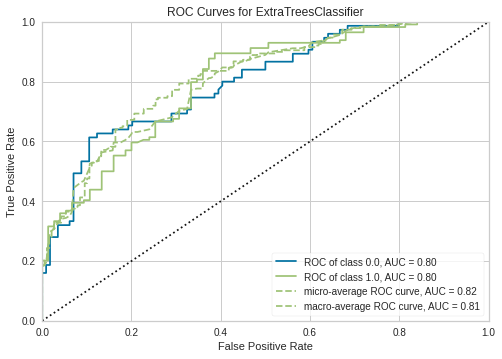

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [20]:
plot_model(tuned_et)

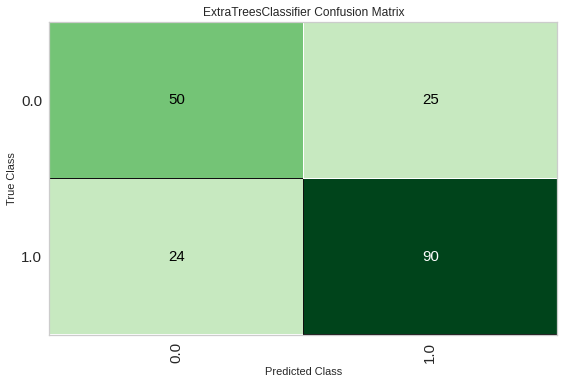

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [21]:
plot_model(tuned_et, plot = 'confusion_matrix')

# __rf__

In [22]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8409,0.8958,0.9600,0.8000,0.8727,0.6652,0.6851
1,0.6364,0.8105,0.7200,0.6667,0.6923,0.2495,0.2506
2,0.7500,0.7895,0.8400,0.7500,0.7925,0.4807,0.4856
3,0.7045,0.7853,0.7600,0.7308,0.7451,0.3941,0.3945
4,0.7500,0.8653,0.8400,0.7500,0.7925,0.4807,0.4856
5,0.8409,0.8979,1.0000,0.7812,0.8772,0.6608,0.7024
6,0.6591,0.7905,0.7200,0.6923,0.7059,0.3008,0.3012
7,0.6591,0.7589,0.6400,0.7273,0.6809,0.3182,0.3212
8,0.7273,0.8484,0.7200,0.7826,0.7500,0.4511,0.4530


INFO:logs:create_model_container: 17
INFO:logs:master_model_container: 17
INFO:logs:display_container: 5
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [23]:
tuned_rf = tune_model(rf, optimize = 'AUC')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7500,0.8779,0.7600,0.7917,0.7755,0.4937,0.4942
1,0.6364,0.7979,0.7600,0.6552,0.7037,0.2397,0.2442
2,0.7045,0.7326,0.8000,0.7143,0.7547,0.3863,0.3902
3,0.6591,0.7989,0.6800,0.7083,0.6939,0.3096,0.3100
4,0.6818,0.7537,0.7600,0.7037,0.7308,0.3433,0.3448
5,0.7273,0.8526,0.8000,0.7407,0.7692,0.4371,0.4390
6,0.6136,0.7705,0.6400,0.6667,0.6531,0.2176,0.2178
7,0.6136,0.7074,0.6000,0.6818,0.6383,0.2273,0.2294
8,0.7727,0.8653,0.7200,0.8571,0.7826,0.5483,0.5574


INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 6
INFO:logs:RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=6, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.001,
                       min_impurity_split=None, min_samples_leaf=6,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       n_estimators=190, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


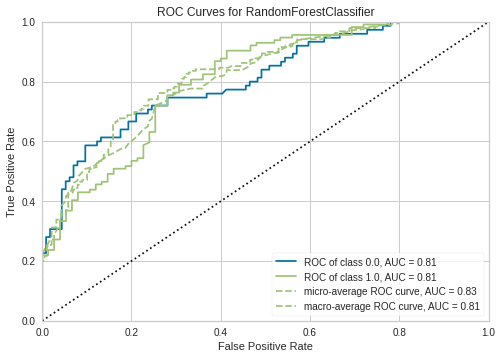

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [24]:
plot_model(tuned_rf)

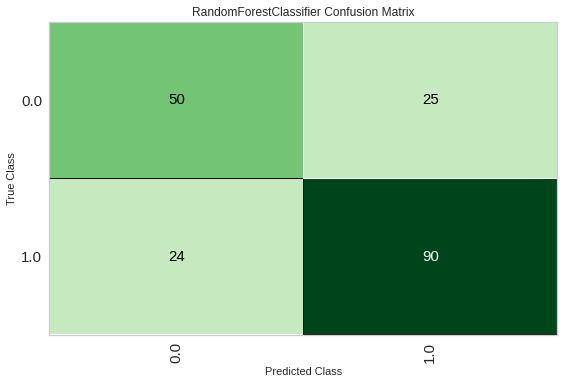

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [25]:
plot_model(tuned_rf, plot = 'confusion_matrix')

# __gbc__

In [26]:
gbc = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7727,0.8821,0.8800,0.7586,0.8148,0.5248,0.5346
1,0.6364,0.7642,0.7200,0.6667,0.6923,0.2495,0.2506
2,0.6591,0.7200,0.8000,0.6667,0.7273,0.2826,0.2911
3,0.7500,0.7989,0.8000,0.7692,0.7843,0.4873,0.4878
4,0.7273,0.8126,0.7600,0.7600,0.7600,0.4442,0.4442
5,0.7500,0.8884,0.8800,0.7333,0.8000,0.4739,0.4881
6,0.7045,0.7621,0.7200,0.7500,0.7347,0.4017,0.4021
7,0.6818,0.7284,0.6800,0.7391,0.7083,0.3597,0.3612
8,0.6818,0.7789,0.6800,0.7391,0.7083,0.3597,0.3612


INFO:logs:create_model_container: 19
INFO:logs:master_model_container: 19
INFO:logs:display_container: 7
INFO:logs:GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [27]:
tuned_gbc = tune_model(gbc, optimize = 'AUC')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8182,0.9158,0.8800,0.8148,0.8462,0.6247,0.6275
1,0.6364,0.8232,0.7200,0.6667,0.6923,0.2495,0.2506
2,0.7045,0.7726,0.8000,0.7143,0.7547,0.3863,0.3902
3,0.7273,0.7716,0.7600,0.7600,0.7600,0.4442,0.4442
4,0.8182,0.8905,0.8000,0.8696,0.8333,0.6341,0.6368
5,0.7955,0.8779,0.9600,0.7500,0.8421,0.5639,0.5994
6,0.6818,0.8021,0.7200,0.7200,0.7200,0.3516,0.3516
7,0.6364,0.7853,0.6000,0.7143,0.6522,0.2772,0.2818
8,0.7045,0.7895,0.6800,0.7727,0.7234,0.4091,0.4129


INFO:logs:create_model_container: 20
INFO:logs:master_model_container: 20
INFO:logs:display_container: 8
INFO:logs:GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.15, loss='deviance', max_depth=7,
                           max_features=1.0, max_leaf_nodes=None,
                           min_impurity_decrease=0.02, min_impurity_split=None,
                           min_samples_leaf=5, min_samples_split=5,
                           min_weight_fraction_leaf=0.0, n_estimators=230,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=123, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


#Ensemble model

In [28]:
bagged_et = ensemble_model(et)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8182,0.8947,1.0000,0.7576,0.8621,0.6098,0.6623
1,0.6818,0.8105,0.8400,0.6774,0.7500,0.3260,0.3406
2,0.7045,0.7600,0.8400,0.7000,0.7636,0.3783,0.3896
3,0.6591,0.7758,0.7200,0.6923,0.7059,0.3008,0.3012
4,0.7500,0.8442,0.8800,0.7333,0.8000,0.4739,0.4881
5,0.8182,0.9158,1.0000,0.7576,0.8621,0.6098,0.6623
6,0.6818,0.7937,0.7600,0.7037,0.7308,0.3433,0.3448
7,0.6818,0.8179,0.6400,0.7619,0.6957,0.3676,0.3737
8,0.7727,0.8316,0.7600,0.8261,0.7917,0.5426,0.5449


INFO:logs:create_model_container: 21
INFO:logs:master_model_container: 21
INFO:logs:display_container: 9
INFO:logs:BaggingClassifier(base_estimator=ExtraTreesClassifier(bootstrap=False,
                                                      ccp_alpha=0.0,
                                                      class_weight=None,
                                                      criterion='gini',
                                                      max_depth=None,
                                                      max_features='auto',
                                                      max_leaf_nodes=None,
                                                      max_samples=None,
                                                      min_impurity_decrease=0.0,
                                                      min_impurity_split=None,
                                                      min_samples_leaf=1,
                                                      min_samples_split=2,

In [29]:
boosted_et = ensemble_model(et, method = 'Boosting')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8182,0.9074,0.8800,0.8148,0.8462,0.6247,0.6275
1,0.6591,0.8021,0.8000,0.6667,0.7273,0.2826,0.2911
2,0.7273,0.7979,0.8400,0.7241,0.7778,0.4298,0.4378
3,0.6364,0.7989,0.7600,0.6552,0.7037,0.2397,0.2442
4,0.7273,0.8379,0.8400,0.7241,0.7778,0.4298,0.4378
5,0.8409,0.9158,0.9600,0.8000,0.8727,0.6652,0.6851
6,0.7045,0.7853,0.7600,0.7308,0.7451,0.3941,0.3945
7,0.7045,0.7937,0.6800,0.7727,0.7234,0.4091,0.4129
8,0.7500,0.8484,0.7600,0.7917,0.7755,0.4937,0.4942


INFO:logs:create_model_container: 22
INFO:logs:master_model_container: 22
INFO:logs:display_container: 10
INFO:logs:AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=ExtraTreesClassifier(bootstrap=False,
                                                       ccp_alpha=0.0,
                                                       class_weight=None,
                                                       criterion='gini',
                                                       max_depth=None,
                                                       max_features='auto',
                                                       max_leaf_nodes=None,
                                                       max_samples=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                      

# Blend Models

In [ ]:
et = create_model('et', verbose=False)
rf = create_model('rf', verbose=False)
gbc = create_model('gbc', verbose=False)

In [30]:
blender = blend_models(estimator_list=[et,rf,gbc], method = 'soft')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7955,0.9074,0.8800,0.7857,0.8302,0.5751,0.5810
1,0.6591,0.8042,0.7200,0.6923,0.7059,0.3008,0.3012
2,0.7500,0.7726,0.8800,0.7333,0.8000,0.4739,0.4881
3,0.6818,0.8053,0.7600,0.7037,0.7308,0.3433,0.3448
4,0.7500,0.8632,0.8400,0.7500,0.7925,0.4807,0.4856
5,0.7727,0.9158,0.9200,0.7419,0.8214,0.5186,0.5417
6,0.6818,0.7895,0.7200,0.7200,0.7200,0.3516,0.3516
7,0.7045,0.7811,0.7200,0.7500,0.7347,0.4017,0.4021
8,0.7500,0.8253,0.7200,0.8182,0.7660,0.5000,0.5047


INFO:logs:create_model_container: 23
INFO:logs:master_model_container: 23
INFO:logs:display_container: 11
INFO:logs:VotingClassifier(estimators=[('et',
                              ExtraTreesClassifier(bootstrap=False,
                                                   ccp_alpha=0.0,
                                                   class_weight=None,
                                                   criterion='gini',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2

In [31]:
blender.estimators_

[ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                      criterion='gini', max_depth=None, max_features='auto',
                      max_leaf_nodes=None, max_samples=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                      oob_score=False, random_state=123, verbose=0,
                      warm_start=False),
 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                        criterion='gini', max_depth=None, max_features='auto',
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, n_estimators=100,
                        n_jobs=-1

## __4. Analysis__

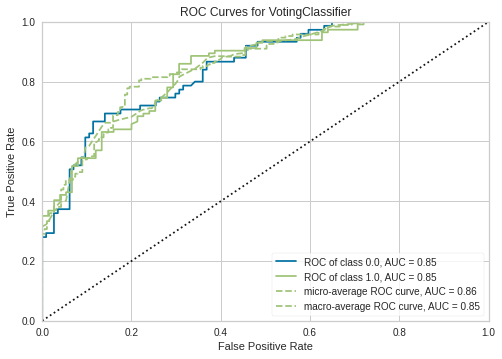

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [32]:
plot_model(blender)

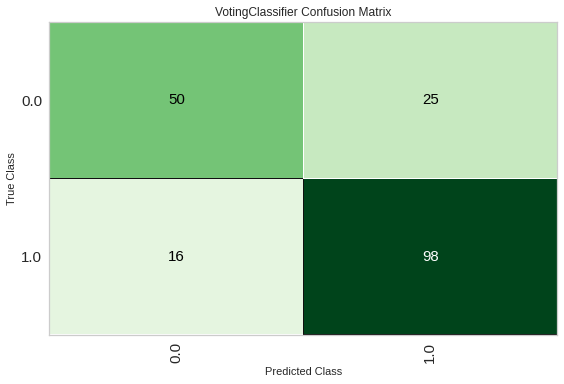

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [33]:
plot_model(blender, plot = 'confusion_matrix')

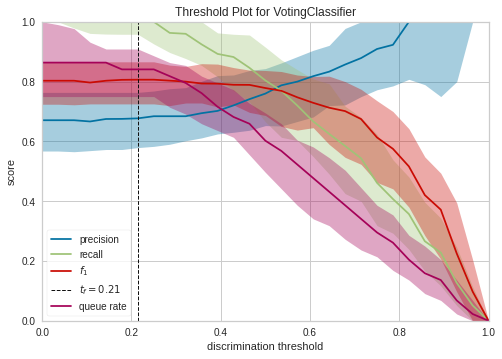

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [34]:
plot_model(blender, plot = 'threshold')

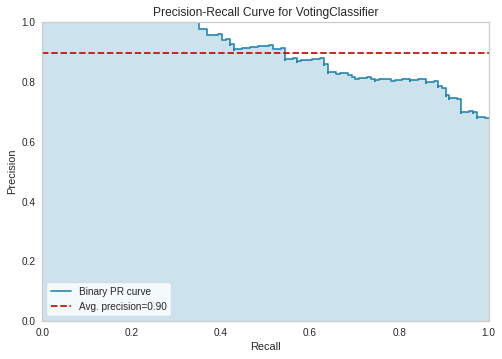

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [35]:
plot_model(blender, plot = 'pr')

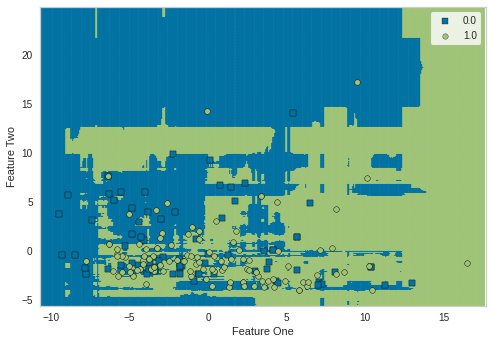

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [36]:
plot_model(blender, plot = 'boundary')

In [37]:
evaluate_model(blender)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=VotingClassifier(estimators=[('et',
                              ExtraTreesClassifier(bootstrap=False,
                                                   ccp_alpha=0.0,
                                                   class_weight=None,
                                                   criterion='gini',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                       

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…